In [21]:
import pandas as pd

# 读取数据集
df = pd.read_csv('users_combined_info_500.csv')

# 查看数据基本信息
df.head()


,user_id,name,location,total_influence,country,event_type,event_action,event_time
0,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-26 20:28:37+08:00
1,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-26 20:42:57+08:00
2,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 04:10:46+08:00
3,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 17:43:50+08:00
4,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 19:56:34+08:00


1. 人口统计分析
国家和地区分布

In [22]:
# 统计国家和地区的分布
country_distribution = df['country'].value_counts()

# 显示结果
print(country_distribution)


country
United States           305788
Germany                 182659
China                    73011
United Kingdom           71606
France                   59570
Canada                   58600
Netherlands              52367
Czechia                  48122
Japan                    46553
Switzerland              38093
Australia                35746
Italy                    30671
Poland                   20002
New Zealand              18444
Spain                    14939
Austria                  11758
Sweden                    9851
Finland                   8815
Denmark                   7412
Bulgaria                  7357
Hungary                   7080
Belgium                   6628
Norway                    6004
India                     5689
United Arab Emirates      5264
Singapore                 5205
Brazil                    5022
Hong Kong                 4767
Malaysia                  4538
Pakistan                  4462
Indonesia                 4248
Russia                    4087


城市级别分布

In [23]:
# 统计城市的分布
city_distribution = df['location'].value_counts()

# 显示结果
print(city_distribution)


location
Germany                               107747
Prague                                 37757
Japan                                  26986
Palo Alto, CA                          19215
UK                                     17789
                                       ...  
北京                                       644
Everything everywhere all at once.       635
Delaware (but Philly at heart)           599
Seville, Spain                           582
Phoenixville, PA                          75
Name: count, Length: 344, dtype: int64


时区分布

In [24]:
# 确保event_time字段是时间格式
df['event_time'] = pd.to_datetime(df['event_time'])

# 提取时区（假设data中没有明确的时区信息，可以从event_time推断）
df['hour'] = df['event_time'].dt.hour

# 统计时区（小时）的分布
timezone_distribution = df['hour'].value_counts().sort_index()

# 显示结果
print(timezone_distribution)


hour
0     37121
1     39586
2     35464
3     32763
4     31255
5     32077
6     41740
7     63000
8     56851
9     64111
10    64592
11    62849
12    64103
13    69941
14    71059
15    71302
16    68460
17    61251
18    60701
19    60547
20    56297
21    53304
22    51274
23    45128
Name: count, dtype: int64


2. 协作行为分析
提交频率

In [25]:
# 按用户统计提交频率
user_submission_frequency = df.groupby('user_id').size()

# 识别高活跃用户和低活跃用户
high_active_users = user_submission_frequency[user_submission_frequency > user_submission_frequency.quantile(0.75)]
low_active_users = user_submission_frequency[user_submission_frequency < user_submission_frequency.quantile(0.25)]

# 显示结果
print('高活跃用户:', high_active_users)
print('低活跃用户:', low_active_users)


高活跃用户: user_id
225          2885
13564        3140
26967        3214
27350        4509
32321        3284
             ... 
66076021     3735
74887181     2997
88161975     3394
91018726     4098
100913391    3177
Length: 124, dtype: int64
低活跃用户: user_id
2621         796
23304       1278
34168       1460
40680       1366
47792       1337
            ... 
62513924    1068
62625502     621
71636191    1158
83238715     923
89584709     862
Length: 124, dtype: int64


3. 其他维度有趣的洞察
提交行为与影响力的关系
可以分析用户的total_influence与他们的提交次数之间的关系。

C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24433 (\N{CJK UNIFIED IDEOGRAPH-5F71}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21709 (\N{CJK UNIFIED IDEOGRAPH-54CD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25552 (\N{CJK UNIFIED IDEOGRAPH-63D0}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_

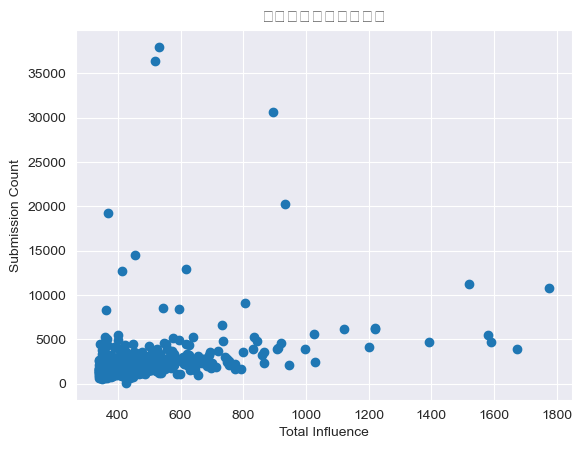

In [28]:
# 将提交频率与影响力结合
user_info = user_submission_frequency.to_frame(name='submission_count')
user_info['total_influence'] = df.groupby('user_id')['total_influence'].first()

# 可视化影响力与提交次数的关系
import matplotlib.pyplot as plt

plt.scatter(user_info['total_influence'], user_info['submission_count'])
plt.xlabel('Total Influence')
plt.ylabel('Submission Count')
plt.title('影响力与提交次数关系')
plt.show()

提交活动时间分析

C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25552 (\N{CJK UNIFIED IDEOGRAPH-63D0}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27963 (\N{CJK UNIFIED IDEOGRAPH-6D3B}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_

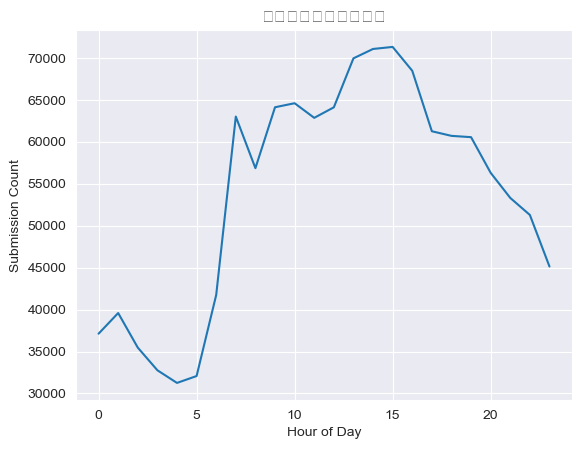

In [27]:
# 提取小时信息
df['hour'] = df['event_time'].dt.hour

# 统计每个小时的提交次数
hourly_submission = df.groupby('hour').size()

# 可视化活动时间
plt.plot(hourly_submission.index, hourly_submission.values)
plt.xlabel('Hour of Day')
plt.ylabel('Submission Count')
plt.title('每日提交活动时间分布')
plt.show()